In [1]:
import pandas as pd
import numpy as np

import cufflinks as cf

import chart_studio.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go


from IPython.display import HTML, display
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
###Cargo los datos de excel
platts = pd.read_excel('Data/platts.xlsx', index_col='Date')
precios= pd.read_excel('Data/precios.xlsx', index_col='Date')
pdn= pd.read_excel('Data/produccion.xlsx', index_col='Date')

In [3]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_excel('Data/platts.xlsx')

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df['Market Basket'], name="Market Basket",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=df.Date, y=df[' PP USA Homo'], name="USA Homo",
                         line_color='deeppink'))

fig.add_trace(go.Scatter(x=df.Date, y=df['PP SE ASIA RAFIA'], name="SE Rafia",
                         line_color='dimgray'))

fig.add_trace(go.Scatter(x=df.Date, y=df[' PP FE ASIA Homo'], name="FE Homo",
                         line_color='mediumpurple'))

fig.update_layout(title_text='Precios Internacionales del PP',
                  xaxis_rangeslider_visible=True)
fig.show()

In [4]:
###Variación eur
r1 = 1
lista1 = []
for i in range(0, len(precios['eur_usd']-1)):
         lista1.append((precios['eur_usd'][i] / precios['eur_usd'][i-1] -1)*100);
precios['Var eur_usd'] = lista1

## Variación yuan
r2 = 1
lista2 = []
for i in range(0, len(precios['yuan_usd']-1)):
         lista2.append((precios['yuan_usd'][i] / precios['yuan_usd'][i-1] -1)*100);
precios['Var yuan_usd'] = lista2
##Variación precios petroleo

r3 = 1
lista3 = []
for i in range(0, len(precios['Precio_petroleo_OPEC']-1)):
         lista3.append((precios['Precio_petroleo_OPEC'][i] / precios['Precio_petroleo_OPEC'][i-1] -1)*100);
precios['Var PreciosOPEC'] = lista3

##Conjunto de datos comparable con platts
variacion_precios= precios.iloc[132:, 3:]
variacion_precios.tail()

,Var eur_usd,Var yuan_usd,Var PreciosOPEC
Date,,,
2019-09-30,-1.060293,0.719251,4.590182
2019-10-31,0.426846,-0.247410,-3.925757
2019-11-30,-0.063303,-1.073829,5.067822
2019-12-31,0.570084,-0.088320,5.614900
2020-01-31,-0.143963,-1.358769,-2.068939


In [5]:
r3 = 1
lista3 = []
for i in range(0, len(platts['Market Basket']-1)):
         lista3.append((platts['Market Basket'][i] / platts['Market Basket'][i-1] -1)*100);
platts['Var Market Basket'] = lista3

platts= platts[1:]

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Variación Market Basket", "Variación EUR/USD", "Variación Yuan/USD", "Precio petroleo Países OPEC"))

fig.add_trace(go.Scatter(x=platts.index, y=platts['Var Market Basket'], name="Market Basket", line_color='mediumvioletred'),
              row=1, col=1)

###Todos a comparar com pp
fig.add_trace(go.Scatter(x=platts.index, y=platts['Var Market Basket'], name="Market Basket", line_color='mediumvioletred'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=platts.index, y=platts['Var Market Basket'], name="Market Basket", line_color='mediumvioletred'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=platts.index, y=platts['Var Market Basket'], name="Market Basket", line_color='mediumvioletred'),
              row=2, col=2)

fig.add_trace(go.Scatter(x=variacion_precios.index, y=variacion_precios['Var eur_usd'], name="Variación EUR/USD", line_color='orangered'),
              row=1, col=2)


fig.add_trace(go.Scatter(x=variacion_precios.index, y=variacion_precios['Var yuan_usd'], name="Variación Yuan/USD", line_color='mediumorchid'),
              row=2, col=1)


fig.add_trace(go.Scatter(x=variacion_precios.index, y=variacion_precios['Var PreciosOPEC'], name="Precios países OPEC", line_color='peru'),
              row=2, col=2)


fig.update_layout(height=500, width=1000,
                  title_text="Mercado del Dinero, Petroleo y PP")

fig.show()

In [7]:
explicatorias= pdn[['Muestra_crudo','Muestra_diesel','Refinación_fuelOil_canada', 'Produccion_gas_RUSIA',
                    'Refinación_Motor_ARABIA']]
explicatorias.tail()

,Muestra_crudo,Muestra_diesel,Refinación_fuelOil_canada,Produccion_gas_RUSIA,Refinación_Motor_ARABIA
Date,,,,,
2019-07-31,1225043,304792,3003.66,22135.7855,14384
2019-08-31,1253670,306862,2870.46,22113.5379,18848
2019-09-30,1197350,299546,2484.18,23612.0013,17910
2019-10-31,1272168,301798,2244.42,25285.6921,17980
2019-11-30,1114492,205567,2544.12,25066.3565,17190


In [8]:
precios.tail()

,eur_usd,yuan_usd,Precio_petroleo_OPEC,Var eur_usd,Var yuan_usd,Var PreciosOPEC
Date,,,,,,
2019-09-30,1.1011,7.1137,62.356667,-1.060293,0.719251,4.590182
2019-10-31,1.1058,7.0961,59.908696,0.426846,-0.247410,-3.925757
2019-11-30,1.1051,7.0199,62.944762,-0.063303,-1.073829,5.067822
2019-12-31,1.1114,7.0137,66.479048,0.570084,-0.088320,5.614900
2020-01-31,1.1098,6.9184,65.103636,-0.143963,-1.358769,-2.068939


In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=("Producción de crudo", "Precios Petroleo Opec",  "Market Basket", "Refinación Diesel", "Refinación Fuel Oil Canadá", "Producción de Gas en Rusia", "Refinación de gasol. Motor en Arab Saud"))

fig.add_trace(go.Scatter(x=explicatorias.index, y=explicatorias['Muestra_crudo'], name= 'Producción de crudo'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=precios[(precios.index.get_level_values(0) >= '2012-01-16 07:00:00') & (precios.index.get_level_values(0) <= '2020-07-16 23:00:00')].index
, y=precios[(precios.index.get_level_values(0) >= '2012-01-16 07:00:00') & (precios.index.get_level_values(0) <= '2020-07-16 23:00:00')]['Precio_petroleo_OPEC'],
                         name='Precios OPEC'
),
              row=1, col=2)

fig.add_trace(go.Scatter(x=platts.index, y=platts['Market Basket'], name="Market Basket", line_color='mediumvioletred'),
              row=1, col=3)

fig.add_trace(go.Scatter(x=explicatorias.index, y=explicatorias['Muestra_diesel'], name='Refinación Diesel'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=explicatorias.index, y=explicatorias['Refinación_fuelOil_canada'], name='Refinación Fuel Oil Canadá'),
              row=2, col=2)

fig.add_trace(go.Scatter(x=explicatorias.index, y=explicatorias['Produccion_gas_RUSIA'], name='Producción de gas en Rusia'),
              row=2, col=3)

fig.add_trace(go.Scatter(x=explicatorias.index, y=explicatorias['Refinación_Motor_ARABIA'], name='Refinación de Gas/Motor ASaud'),
              row=3, col=1)

fig.update_layout(height=700, width=1000,
                  title_text="Determinantes de la oferta y su relación con los precios")

fig.show()

In [10]:
import warnings
warnings.filterwarnings("ignore")
###Variación crudo
r1 = 2
lista1 = []
for i in range(0, len(explicatorias['Muestra_crudo']-1)):
         lista1.append((explicatorias['Muestra_crudo'][i] / explicatorias['Muestra_crudo'][i-1] -1)*100);
explicatorias['Var_Muestra_crudo'] = lista1

## Variación diesel
r2 = 2
lista2 = []
for i in range(0, len(explicatorias['Muestra_diesel']-1)):
         lista2.append((explicatorias['Muestra_diesel'][i] / explicatorias['Muestra_diesel'][i-1] -1)*100);
explicatorias['Var_Muestra_diesel'] = lista2

##Variación precios fuel oil canadá
r3 = 2
lista3 = []
for i in range(0, len(explicatorias['Refinación_fuelOil_canada']-1)):
         lista3.append((explicatorias['Refinación_fuelOil_canada'][i] / explicatorias['Refinación_fuelOil_canada'][i-1] -1)*100);
explicatorias['Var_Refinación_fuelOil_canada'] = lista3;

##Produicción de gas Rusia
r4 = 2
lista4 = []
for i in range(0, len(explicatorias['Produccion_gas_RUSIA']-1)):
         lista4.append((explicatorias['Produccion_gas_RUSIA'][i] / explicatorias['Produccion_gas_RUSIA'][i-1] -1)*100);
explicatorias['Var_Produccion_gas_RUSIA'] = lista4;

##Produicción de motor arabia
r5 = 2
lista5 = []
for i in range(0, len(explicatorias['Refinación_Motor_ARABIA']-1)):
         lista5.append((explicatorias['Refinación_Motor_ARABIA'][i] / explicatorias['Refinación_Motor_ARABIA'][i-1] -1)*100);
explicatorias['Var_Refinación_Motor_ARABIA'] = lista5;

##Conjunto de datos comparable con platts
variacion_explicatorias= explicatorias.iloc[24:, 5:]
variacion_explicatorias.tail()


###Eliminación de outliers
q= variacion_explicatorias['Var_Muestra_crudo'].quantile(0.99)
variacion_explicatorias['Var_Muestra_crudo'] = variacion_explicatorias[variacion_explicatorias["Var_Muestra_crudo"] < q]
r= variacion_explicatorias['Var_Muestra_diesel'].quantile(0.99)
variacion_explicatorias['Var_Muestra_diesel'] = variacion_explicatorias[variacion_explicatorias["Var_Muestra_diesel"] < r]
s= variacion_explicatorias['Var_Refinación_fuelOil_canada'].quantile(0.99) 
variacion_explicatorias['Var_Refinación_fuelOil_canada'] = variacion_explicatorias[variacion_explicatorias["Var_Refinación_fuelOil_canada"] < s]
t= variacion_explicatorias['Var_Produccion_gas_RUSIA'].quantile(0.99)
variacion_explicatorias['Var_Produccion_gas_RUSIA'] = variacion_explicatorias[variacion_explicatorias["Var_Produccion_gas_RUSIA"] < t]
u= variacion_explicatorias['Var_Refinación_Motor_ARABIA'].quantile(0.99)
variacion_explicatorias['Var_Refinación_Motor_ARABIA'] = variacion_explicatorias[variacion_explicatorias["Var_Refinación_Motor_ARABIA"] < u]
     


In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Variación en pdn. crudo", "Variación Refinación Diesel", "Variación pdn de gas Rusia", "Variacón gas motor Arab"))
###Gráfica 1
fig.add_trace(go.Scatter(x=variacion_explicatorias.index , y=variacion_explicatorias['Var_Muestra_crudo'], name= 'Variac. Producción Crudo'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=platts.index , y=platts['Var Market Basket'], name = 'Vaiac. Market Basket', line_color='mediumvioletred'),
              row=1, col=1)

##Gráfica 2
fig.add_trace(go.Scatter(x=variacion_explicatorias.index, y=variacion_explicatorias['Var_Refinación_Motor_ARABIA'], name = 'Variac. refinación Diesel'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=platts.index , y=platts['Var Market Basket'], name = 'Vaiac. Market Basket', line_color='mediumvioletred'),
              row=1, col=2)

##Gráfica 3
fig.add_trace(go.Scatter(x=variacion_explicatorias.index, y=variacion_explicatorias['Var_Produccion_gas_RUSIA'], name='Var pdn. Gas en Rusia'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=platts.index , y=platts['Var Market Basket'], name = 'Vaiac. Market Basket', line_color='mediumvioletred'),
              row=2, col=1)

##Gráfica 4
fig.add_trace(go.Scatter(x=variacion_explicatorias.index, y=variacion_explicatorias['Var_Refinación_Motor_ARABIA'], name= 'Variac. Refinac Motor Ar Saud'),
              row=2, col=2)
fig.add_trace(go.Scatter(x=platts.index , y=platts['Var Market Basket'], name = 'Vaiac. Market Basket', line_color='mediumvioletred'),
              row=2, col=2)


fig.update_layout(height=500, width=1000,
                  title_text="Variación de los determinantes de la Oferta Vs Market Basket")

fig.show()

In [12]:
###Organizando datos para pronóstico
platts = pd.read_excel('Data/platts.xlsx', index_col='Date')
precios= pd.read_excel('Data/precios.xlsx', index_col='Date')
pdn= pd.read_excel('Data/produccion.xlsx', index_col='Date')

mg1= pd.merge(pdn, precios, on= 'Date')

##Exporto lo construido a Excel para facilitar ensayos
outputFile = "Data/appen.xlsx" ##Imprimiendo el conjunto de datos
mg1[-3:].to_excel(outputFile) # Only argument is a string of the output file path
mg1= mg1.shift(periods=3)## Lag 3 de las variables explicatorias



In [13]:
appen = pd.read_excel('Data/appencor.xlsx', index_col='Date')
m2= mg1.append(appen)
datoscompletos= pd.merge(m2, platts, on= 'Date')

exog= datoscompletos.iloc[0:, 0:-1] ##Variables exógenas
exog= exog[['Muestra_crudo','Muestra_diesel','Refinación_fuelOil_canada', 'Produccion_gas_RUSIA',
                    'Refinación_Motor_ARABIA', 'eur_usd', 'yuan_usd']]

ads = (datoscompletos['Market Basket'])

In [14]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

%matplotlib inline

## Arimax optimizado

In [15]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [16]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 3)
D=1 
Qs = range(0, 2)
s = 3 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [17]:
def optimizeSARIMAX(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads,  exog=exog, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [18]:
result_table = optimizeSARIMAX(parameters_list, d, D, s)

In [19]:
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(ads, exog=exog, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                     Market Basket   No. Observations:                   74
Model:             SARIMAX(2, 1, 3)x(0, 1, 1, 3)   Log Likelihood                -375.495
Date:                           Mon, 10 Feb 2020   AIC                            778.990
Time:                                   20:04:29   BIC                            810.468
Sample:                               01-31-2014   HQIC                           791.493
                                    - 02-29-2020                                         
Covariance Type:                             opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Muestra_crudo                -0.0003      0.000     -1.523      0.128      -0.001    8.91e-0

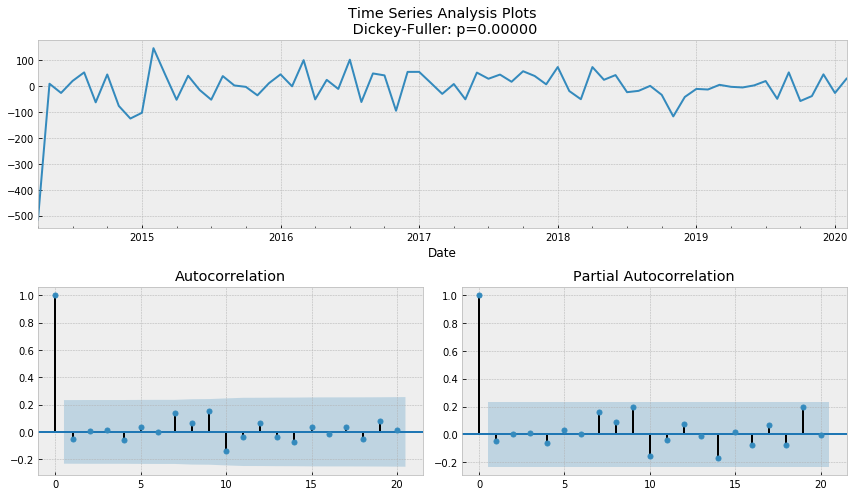

In [20]:
tsplot(best_model.resid[1+2:], lags=20)

In [21]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
exog_test= datoscompletos[['Muestra_crudo','Muestra_diesel','Refinación_fuelOil_canada', 'Produccion_gas_RUSIA',
                    'Refinación_Motor_ARABIA', 'eur_usd', 'yuan_usd']].iloc[(len(exog)-3):, 0:] ##Extensión necesaria para 4 meses

##Parámetros del modelo
ads = pd.DataFrame(ads)
series = ads
model = best_model
n_steps = 2 ##Extensión necesaria para 4 meses

### Modelo

# adding model values
data = series.copy()
data.columns = ['actual']
data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps, exog=exog_test)
forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

forecast= pd.DataFrame(forecast)
pd.DataFrame({'Forecast ARIMAX': forecast[0]})
forecast= pd.DataFrame({'Forecast ARIMAX': forecast[0]})
forecast.index.names = ['Date']

##Visualización del modelo

fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['actual'], name="Market Basket real",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Forecast ARIMAX'], name="FORECAST",
                         line_color='deeppink'))


fig.update_layout(title_text="Model 1 Forecast with Mean Absolute Percentage Error: {0:.2f}%".format(error),
                  xaxis_rangeslider_visible=True)
fig.show()
forecast_arimax = forecast[-4:]
forecast[-4:]

,Forecast ARIMAX
Date,
2020-02-29,983.294643
2020-03-31,1030.252209
2020-04-30,1054.625301
2020-05-31,995.590519


## Arimax optimizado

In [23]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads['Market Basket'], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [24]:
result_table = optimizeSARIMA(parameters_list, d, D, s)

In [25]:
p, q, P, Q = result_table.parameters[0]

best_model_arima=sm.tsa.statespace.SARIMAX(ads['Market Basket'], order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model_arima.summary())

                                 Statespace Model Results                                
Dep. Variable:                     Market Basket   No. Observations:                   74
Model:             SARIMAX(2, 1, 2)x(0, 1, 1, 3)   Log Likelihood                -377.137
Date:                           Mon, 10 Feb 2020   AIC                            766.274
Time:                                   20:05:52   BIC                            779.765
Sample:                               01-31-2014   HQIC                           771.633
                                    - 02-29-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8299      0.295      2.814      0.005       0.252       1.408
ar.L2         -0.5008      0.252     -1.987

In [26]:
##Parámetros del modelo
ads = pd.DataFrame(ads)
series = ads
model1 = best_model_arima
n_steps = 3 ##Extensión necesaria para 3 meses

### Modelo

# adding model values
data = series.copy()
data.columns = ['actual']
data['arima_model'] = model1.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
data['arima_model'][:s+d] = np.NaN

 # forecasting on n_steps forward 
forecast2 = model1.predict(start = data.shape[0], end = data.shape[0]+n_steps)
forecast2 = data.arima_model.append(forecast2)
  
 # calculate error, again having shifted on s+d steps from the beginning
error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

forecast2= pd.DataFrame(forecast2)
pd.DataFrame({'Forecast ARIMA': forecast2[0]})
forecast2= pd.DataFrame({'Forecast ARIMA': forecast2[0]})
forecast2.index.names = ['Date']

##Visualización del modelo

fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['actual'], name="Market Basket real",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=forecast2.index, y=forecast2['Forecast ARIMA'], name="FORECAST2",
                         line_color='deeppink'))


fig.update_layout(title_text="Model 2 Forecast with Mean Absolute Percentage Error: {0:.2f}%".format(error),
                  xaxis_rangeslider_visible=True)
fig.show()
forecast_arima= forecast2[-5:-1]
forecast2[-5:-1]



,Forecast ARIMA
Date,
2020-02-29,1030.269591
2020-03-31,994.637753
2020-04-30,995.559620
2020-05-31,968.265414


### Holt Winters optimizado

In [27]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [28]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=4): ##Función de Validación cruzada
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=7) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [29]:
%%time
data = ads['Market Basket'] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model2 = HoltWinters(data, slen = 2, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 4, scaling_factor = 1)
model2.triple_exponential_smoothing()

1.0 0.002553684980156845 0.2954550024478822
Wall time: 2.49 s


In [30]:
forecast3 = pd.DataFrame(model2.result, forecast2.index)
pd.DataFrame({'Forecast HOLT': forecast3[0]})
forecast3= pd.DataFrame({'Forecast HOLT': forecast3[0]})
forecast3.index.names = ['Date']
forecast3.tail()
data = pd.DataFrame(data)

error = mean_absolute_percentage_error(ads['Market Basket'], forecast3['Forecast HOLT'])

##Visualización del modelo

fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Market Basket'], name="Market Basket real",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=forecast2.index, y=forecast3['Forecast HOLT'], name="FORECAST2",
                         line_color='deeppink'))


fig.update_layout(title_text="Model 2 Forecast with Mean Absolute Percentage Error: {0:.2f}%".format(error),
                  xaxis_rangeslider_visible=True)
fig.show()
forecast_holt= forecast3[-5:-1]
forecast3[-5:-1]

,Forecast HOLT
Date,
2020-02-29,996.949360
2020-03-31,1007.138549
2020-04-30,982.898719
2020-05-31,979.037268


## Análisis de resultados y combinación de pronóstico

In [31]:
mg1 = pd.merge(forecast_arimax, forecast2, on = 'Date')
familia = pd.merge(mg1, forecast3, on = 'Date')

In [32]:
market = ads['Market Basket'].values.tolist()
#### Función sin pesos ####
def mediamovil(lista,datos_a_simular,tamaño_de_media_movil):
    global market
    mar_sinpesos=[]
    mar_sinpesos=lista
    for i in range(datos_a_simular):
        mar_sinpesos.append(sum(mar_sinpesos[-tamaño_de_media_movil:])/len(mar_sinpesos[-tamaño_de_media_movil:]))
    market = ads['Market Basket'].values.tolist()
    return mar_sinpesos
sin_pesos=mediamovil(market,4,3)
familia['MA3'] = sin_pesos[-4:]


#### Función con 
def mediamovil(lista,datos_a_simular,tamaño_de_media_movil):
    global market
    mar_conpesos=[]
    mar_conpesos=lista
    for i in range(datos_a_simular):
        mar_conpesos.append(mar_conpesos[-tamaño_de_media_movil+0]*0.1+mar_conpesos[-tamaño_de_media_movil+1]*0.3+mar_conpesos[-tamaño_de_media_movil+2]*0.6)
    market = data['Market Basket'].values.tolist()
    return mar_conpesos

con_pesos = mediamovil(market,4,3)
sin_pesos=mediamovil(market,4,3)
familia['WMA3'] = con_pesos[-4:]

familia['Models mean'] = ((familia['Forecast ARIMAX'] + familia['Forecast ARIMA'] + familia['Forecast HOLT'] )/ 3)

In [33]:
familia

,Forecast ARIMAX,Forecast ARIMA,Forecast HOLT,MA3,WMA3,Models mean
Date,,,,,,
2020-02-29,983.294643,1030.269591,996.949360,1024.000000,1020.9000,1003.504531
2020-03-31,1030.252209,994.637753,1007.138549,1025.333333,1019.9400,1010.676170
2020-04-30,1054.625301,995.559620,982.898719,1020.111111,1019.3340,1011.027880
2020-05-31,995.590519,968.265414,979.037268,1023.148148,1019.6724,980.964400


In [34]:
##Visualización del modelo
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index[-12:], y=data['Market Basket'][-12:], name="Market Basket real",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=familia.index, y=familia['Forecast ARIMAX'], name="Modelo 1",
                         line_color='deeppink'))

fig.add_trace(go.Scatter(x=familia.index, y=familia['Forecast ARIMA'], name="Modelo 2",
                         line_color='mediumorchid'))

fig.add_trace(go.Scatter(x=familia.index, y=familia['Forecast HOLT'], name="Modelo 3",
                         line_color='lightpink'))

fig.add_trace(go.Scatter(x=familia.index, y=familia['Models mean'], name="Acuerdo entre modelos",
                         line_color='darkgreen'))

fig.add_trace(go.Scatter(x=familia.index, y=familia['WMA3'], name="MI1",
                         line_color='darkkhaki'))

fig.add_trace(go.Scatter(x=familia.index, y=familia['MA3'], name="MI2",
                         line_color='darkgoldenrod'))


fig.update_layout(title_text="Combinación de pronósticos con la información disponible",
                  xaxis_rangeslider_visible=True)
fig.show()


In [35]:
## Exporto los pronósticos a excel
outputFile = "Data/forecast.xlsx" ##Imprimiendo el conjunto de datos
familia.to_excel(outputFile) # Only argument is a string of the output file path

In [36]:
ads['month'] = ads.index.month
ads['year'] = ads.index.year
import plotly.io as pio
df = ads

colors = ['darkgoldenrod', 'darkgrey', 'darkseagreen', 'deepskyblue', 'darkviolet', 'greenyellow']


opt = []
opts1 = []
for i in range(0, len(colors)):
    opt = dict(
        target = df['year'][[i]].unique(), value = dict(marker = dict(color = colors[i]))
    )
opts1.append(opt)

data = [dict(
  type = 'scatter',
  mode = 'markers',
  x = df['month'],
  y = df['Market Basket'],
  text = df['Market Basket'],
  hoverinfo = 'text',
  opacity = 0.8,
  marker = dict(
      size = df['Market Basket'],
      sizemode = 'area',
      sizeref = 7
  ),
  transforms = [
     
      dict(
        type = 'groupby',
        groups = df['year'],
        styles = opts1
    )]
)]

layout = dict(
    yaxis = dict(
        type = 'log'
    )
)

fig_dict = dict(data=data, layout=layout)
pio.show(fig_dict, validate=False)

In [37]:
pwd

'C:\\Users\\cdani\\OneDrive\\Maestría\\Git'